In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('../data/X_train.csv', index_col=['SK_ID_CURR'])
y_train = pd.read_csv('../data/y_train.csv')

X_test = pd.read_csv('../data/X_test.csv', index_col=['SK_ID_CURR'])
y_test = pd.read_csv('../data/y_test.csv')

In [3]:
# Todas as features
clf = svm.SVC(kernel='linear', max_iter=1500, random_state=17)
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)

/home/caio/Documents/am1/am1/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [4]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.60      0.73     84322
           1       0.09      0.42      0.14      7541

    accuracy                           0.59     91863
   macro avg       0.50      0.51      0.44     91863
weighted avg       0.85      0.59      0.68     91863



In [5]:
# Duas features apenas
clf = svm.SVC(kernel='linear', max_iter=1500, random_state=17)
clf.fit(X_train.loc[:, ['AMT_INCOME_TOTAL', 'AMT_CREDIT']], y_train.values.ravel())
y_pred = clf.predict(X_test.loc[:, ['AMT_INCOME_TOTAL', 'AMT_CREDIT']])

/home/caio/Documents/am1/am1/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     84322
           1       0.08      1.00      0.15      7541

    accuracy                           0.08     91863
   macro avg       0.54      0.50      0.08     91863
weighted avg       0.92      0.08      0.01     91863



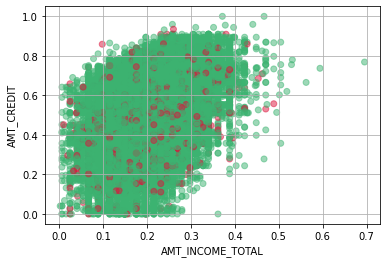

In [8]:
#visualização
colors = y_test['TARGET'].map({0:'mediumseagreen', 1:'crimson'}).values.tolist()
plt.scatter(X_test.loc[:, ['AMT_INCOME_TOTAL']], X_test.loc[:, ['AMT_CREDIT']], c=colors, alpha=0.5)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.grid()